(49,)
(10, 10, 3)


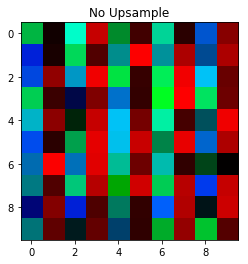

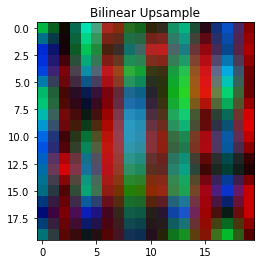

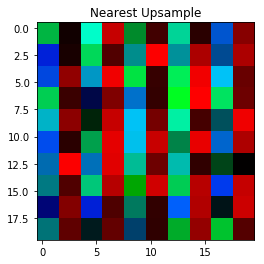

In [125]:
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

import torch

# Make a grid...
nrows, ncols = 10,10
image = np.zeros(nrows*ncols)
image2 = np.zeros(nrows*ncols)
image3 = np.zeros(nrows*ncols)

test = np.random.random(nrows*ncols //2 - 1)
print(image[2::2].shape)

# Set every other cell to a random number (this would be your data)
image[::2] = np.random.random(nrows*ncols //2 - 0)
image = np.roll(image,1)
image2[::2] = np.random.random(nrows*ncols //2 - 0)
image3[::2] = np.random.random(nrows*ncols //2 - 0)
#image3 = np.roll(image3,1)


image = image.reshape((nrows, ncols))
image2 = image2.reshape((nrows, ncols))
image3 = image3.reshape((nrows, ncols))


# Reshape things into a 10x10 grid.
image = image.reshape((nrows, ncols))
a = np.expand_dims(image,axis=2)
full_image = np.repeat(a,3,axis=2)
full_image[:,:,1] = image2
full_image[:,:,2] = image3
print(full_image.shape)

plt.imshow(full_image)
plt.title('No Upsample')
plt.show()

linear_upsample = nn.Upsample(scale_factor=2, mode='bilinear',align_corners=True)
near_upsample = nn.Upsample(scale_factor=2, mode='nearest')

# Arrange array so that pytorch can understand it...
b = torch.from_numpy(full_image)
b = b.permute(2,0,1)
b = b.unsqueeze(0)

#upsample
r2 = linear_upsample(b)
#change back to numpy dimensions
r2 = r2[0,:,:,:]
r2 = r2.permute(1,2,0)
plt.imshow(r2.numpy())
plt.title('Bilinear Upsample')
plt.show()

#upsample
r3 = near_upsample(b)
#change back to numpy dimensions
r3 = r3[0,:,:,:]
r3 = r3.permute(1,2,0)

plt.imshow(r3.numpy())
plt.title('Nearest Upsample')
plt.show()